In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_theme()

In [2]:
df = pd.read_csv("traffic_collisions.csv")
raw_df = pd.read_csv("Traffic_Collisions_Open_Data.csv")

In [3]:
df.columns

Index(['EVENT_UNIQUE_ID', 'DATE', 'MONTH', 'DOW', 'YEAR', 'HOUR', 'DIVISION',
       'FATALITIES', 'INJURY', 'FLED_SCENE', 'PROPERTY_DAMAGE',
       'NEIGHBOURHOOD', 'LONG', 'LAT', 'AUTOMOBILE', 'MOTORCYCLE', 'BICYCLE',
       'PEDESTRIAN'],
      dtype='object')

<Axes: xlabel='YEAR', ylabel='count'>

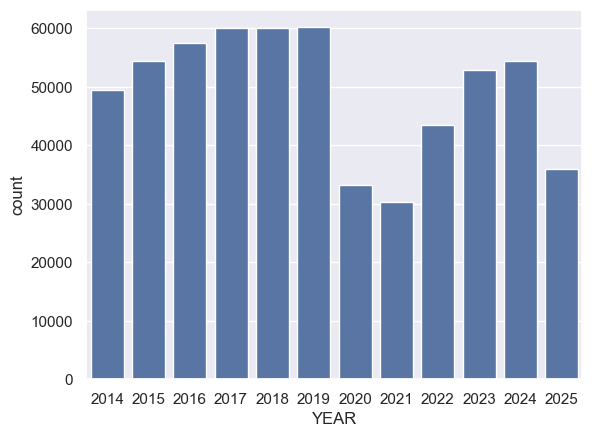

In [4]:
sns.countplot(x="YEAR", data=df)

<Axes: xlabel='HOUR', ylabel='count'>

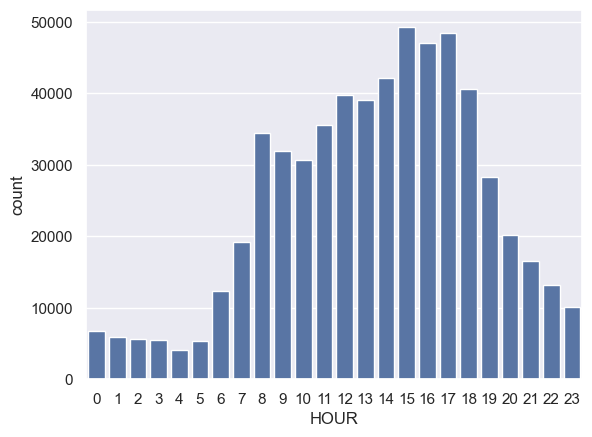

In [5]:
sns.countplot(x="HOUR", data=df)

<Axes: xlabel='DOW', ylabel='count'>

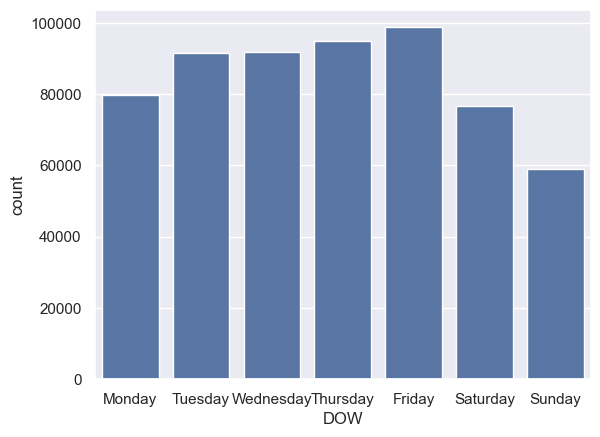

In [26]:
sns.countplot(data=df, x='DOW', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

<Axes: xlabel='MONTH', ylabel='count'>

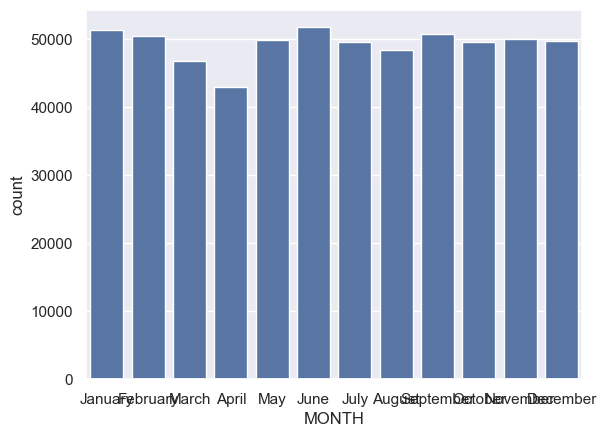

In [29]:
sns.countplot(data=df, x='MONTH')

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [27]:
year_to_plot = 2023
df_year = df[df['DATE'].dt.year == year_to_plot]

#group by day per year
daily = df_year.groupby('DATE').size().reset_index(name='COLLISIONS')

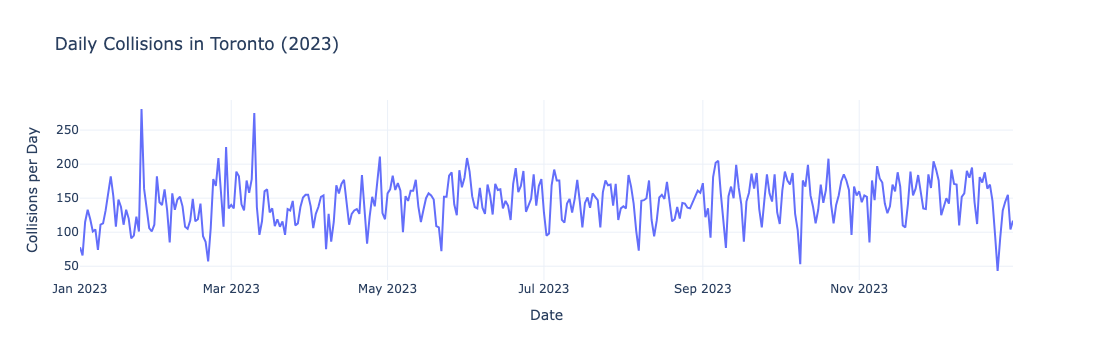

In [28]:
fig = px.line(
    daily,
    x='DATE',
    y='COLLISIONS',
    title=f'Daily Collisions in Toronto ({year_to_plot})',
    labels={'DATE': 'Date', 'COLLISIONS': 'Number of Collisions'},
)

fig.update_layout(
    template='plotly_white',
    hovermode='x unified',
    xaxis_title='Date',
    yaxis_title='Collisions per Day'
)

fig.show()

In [10]:
daily

,DATE,COLLISIONS
0,2020-01-01,98
1,2020-01-02,103
2,2020-01-03,110
3,2020-01-04,92
4,2020-01-05,126
...,...,...
361,2020-12-27,28
362,2020-12-28,46
363,2020-12-29,58
364,2020-12-30,77


In [11]:
df_2024 = df[df['DATE'].dt.year == 2024]
df_2023 = df[df['DATE'].dt.year == 2023]
df_2022 = df[df['DATE'].dt.year == 2022]
df_2021 = df[df['DATE'].dt.year == 2021]
df_2020 = df[df['DATE'].dt.year == 2020]
df_2019 = df[df['DATE'].dt.year == 2019]

<Axes: xlabel='HOUR', ylabel='count'>

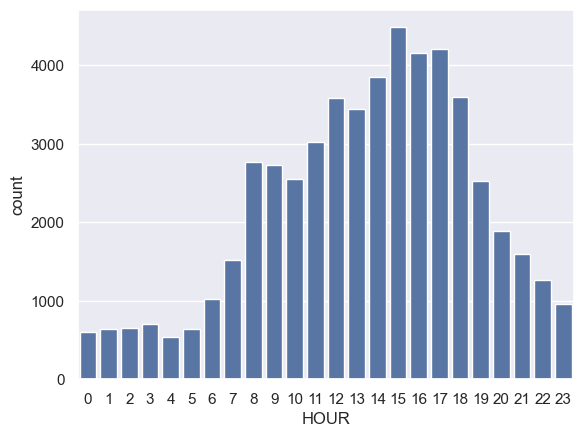

In [12]:
sns.countplot(x='HOUR', data=df_2023)

<Axes: xlabel='HOUR', ylabel='count'>

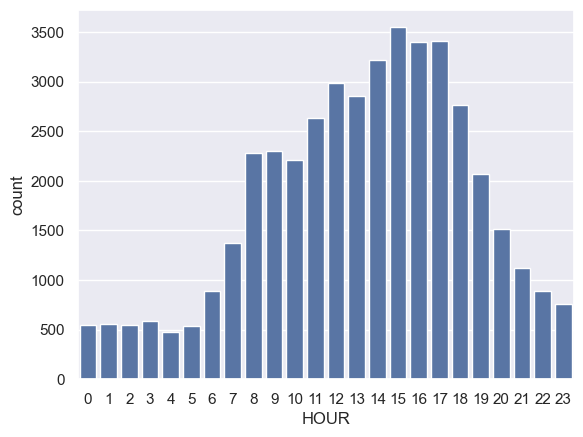

In [13]:
sns.countplot(x='HOUR', data=df_2022)

<Axes: xlabel='HOUR', ylabel='count'>

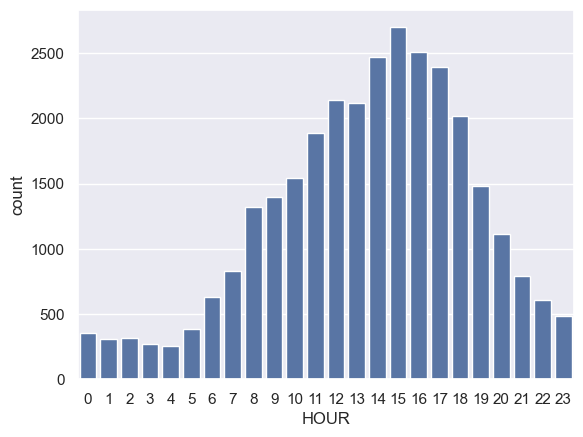

In [14]:
sns.countplot(x='HOUR', data=df_2021)

<Axes: xlabel='HOUR', ylabel='count'>

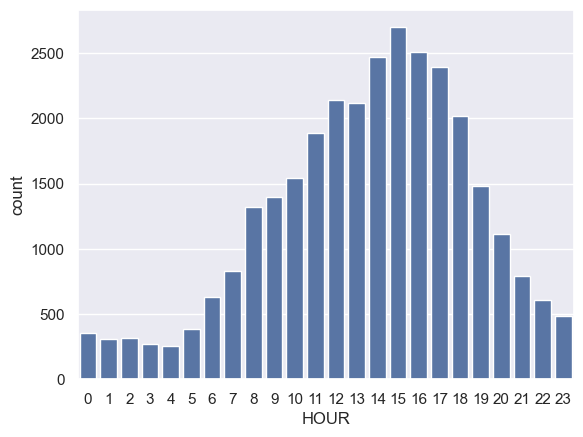

In [15]:
sns.countplot(x='HOUR', data=df_2021)

<Axes: xlabel='INJURY', ylabel='count'>

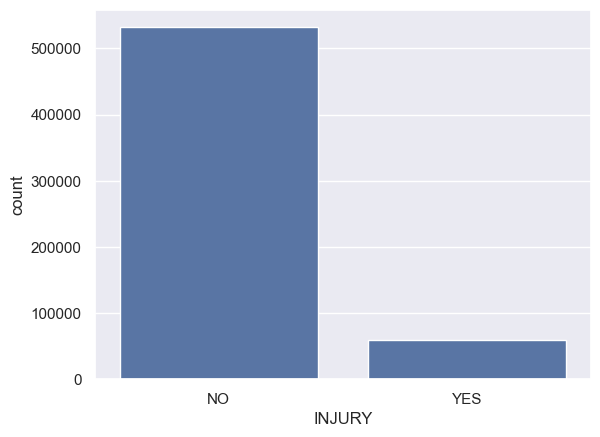

In [65]:
sns.countplot(x='INJURY', data=df)

<Axes: xlabel='PROPERTY_DAMAGE', ylabel='count'>

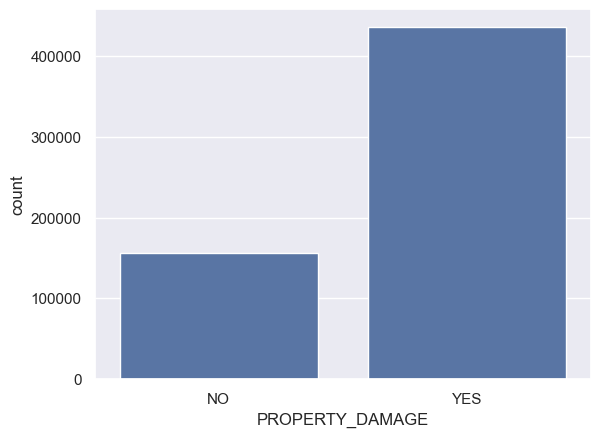

In [66]:
sns.countplot(x='PROPERTY_DAMAGE', data=df)

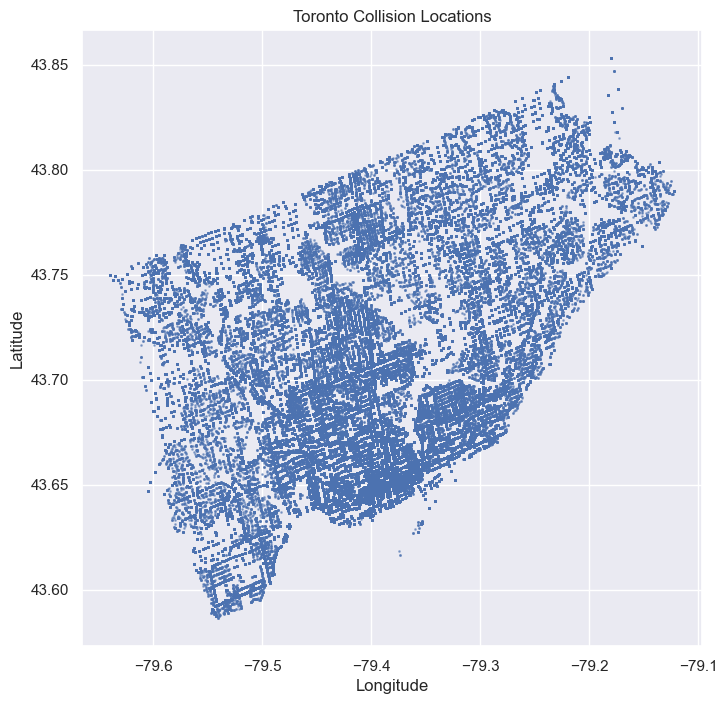

In [99]:
plt.figure(figsize=(8, 8))
plt.scatter(df['LONG'], df['LAT'], s=1, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Toronto Collision Locations')
plt.show()

In [63]:
injury_fatal_df = df[(df['FATALITIES'] > 0) | (df['INJURY'] == "YES")]

In [95]:
injury_fatal_df.shape

(60158, 18)

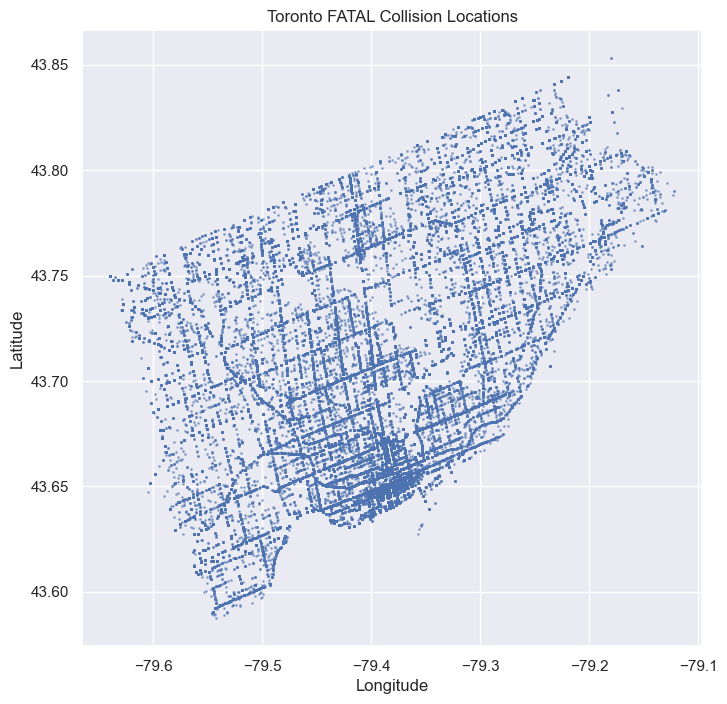

In [102]:
plt.figure(figsize=(8, 8))
plt.scatter(injury_fatal_df['LONG'], injury_fatal_df['LAT'], s=1, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Toronto FATAL Collision Locations')
plt.show()